#<big> <b>**DENUNCIAS DE ROBO DE AUTOMOTORES EN ARGENTINA (2018-2025)**</b></big>

Fuente: [datos.gob.ar/dataset/justicia-solicitudes-autorizacion-portacion-armas-fuego](https://datos.gob.ar/dataset/justicia-solicitudes-autorizacion-portacion-armas-fuego)

Este análisis tiene como objetivo explorar y comprender el comportamiento de las denuncias de robo de automotores en Argentina entre 2018 y mediados de 2025. Los datos fueron obtenidos del portal oficial [datos.gob.ar](https://datos.gob.ar)

El dataset contiene más de 280.000 registros, e incluye información como el tipo de trámite, la fecha del mismo, el lugar donde se realizó (provincia y seccional), características del vehículo y algunos datos demográficos del titular.

Para este análisis, se realizó un proceso completo de limpieza y transformación de los datos, identificando valores nulos, categorías mal escritas y errores de consistencia. Luego, se generó un nuevo dataset depurado que permitió una exploración más confiable y clara.

**Las principales preguntas objetivo que guiaron el análisis fueron:**

    
    
* ¿Cómo evolucionó la cantidad de denuncias de robo de automotores en la provincia de Jujuy entre 2018 y mediados de 2025?
* ¿Como fue la evolución anual de las denuncias de robo de vehículos a nivel nacional?
* ¿Cómo varía la cantidad de denuncias de robo por mes, comparando los distintos años a nivel Nacional?

#**INSTALACION E IMPORTACIÓN DE LIBRERIAS NECESARIAS**

##Instalamos librerias necesarias

In [59]:
!pip install chardet

##Importamos librerias necesarias

In [57]:
# Manipulación de datos
import pandas as pd
import numpy as np
import os
import chardet
import csv

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import pygwalker as pyg

## Configuracion de display, maximo de filas, columnas y ancho de columnas a mostrar

In [3]:
# Cambiar configuración para que se muestren más filas y columnas
pd.set_option('display.max_rows', 100)      # hasta 100 filas
pd.set_option('display.max_columns', 100)    # hasta 100 columnas
pd.set_option('display.max_colwidth', None)  # sin límite en el ancho de columnas

#**CONEXION CON GOOGLE DRIVE**

##Conectamos con Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Ruta de nuestro archivo

In [5]:
ruta_archivo = '/content/drive/MyDrive/Colab Notebooks/Proyecto-robos-recupero-autos/robo-recupero-autos-dataset.csv'

#**DETECCION DE ENCONDING Y SEPARADOR PARA LECTURA CORRECTA DE ARCHIVO**

##Detectamos tipo de enconding

In [6]:
# Leer una parte del archivo en modo binario
with open(ruta_archivo, 'rb') as f:
    resultado = chardet.detect(f.read(100000))  # lee los primeros 100 KB

encoding_detectado = resultado['encoding']

print("Encoding detectado:", encoding_detectado)

Encoding detectado: utf-8


##Detectamos el separador

In [7]:
#Detectar separador con csv.Sniffer

with open(ruta_archivo, 'r', encoding=encoding_detectado) as f:
    muestra = f.read(4096)  # Leer una muestra del archivo

dialecto = csv.Sniffer().sniff(muestra)
separador_detectado = dialecto.delimiter

print("Separador detectado:", repr(separador_detectado))

Separador detectado: ','


#**PROCESAMIENTO DEL DATASET**

##Leemos el archivo con Pandas

In [8]:
df = pd.read_csv(ruta_archivo, encoding=encoding_detectado, sep=separador_detectado)

print("\nArchivo cargado con éxito:")

df.head()

/tmp/ipython-input-8-992038911.py:1: DtypeWarning: Columns (8,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_archivo, encoding=encoding_detectado, sep=separador_detectado)



Archivo cargado con éxito:


,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,automotor_marca_codigo,automotor_marca_descripcion,automotor_modelo_codigo,automotor_modelo_descripcion,automotor_uso_codigo,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id,titular_domicilio_provincia_indec_id,titular_pais_nacimiento_indec_id
0,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2021-04-30,1994-01-10,1134,LANUS Nº 3,Buenos Aires,Importado,1994.0,NaN,AUTOMOVIL FURGON 4 P,092,MERCEDES BENZ,006,MB 180 D,1.0,Privado,Física,MONTE CHINGOLO,BUENOS AIRES,Femenino,1963.0,ARGENTINA,100.0,6.0,ARG,NaN,NaN
1,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2021-04-27,1995-01-25,1244,LA MATANZA Nº 11,Buenos Aires,Nacional,1995.0,NaN,BERLINA 5 PUERTAS,37,RENAULT,AH,RENAULT 19 RN INYEC.(BIC),1.0,Privado,Física,RAMOS MEJIA,BUENOS AIRES,Femenino,1977.0,ARGENTINA,100.0,6.0,ARG,NaN,NaN
2,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2021-04-07,1992-08-28,1200,SAN MARTIN Nº 6,Buenos Aires,Importado,1992.0,NaN,CHASIS P/CAMION,NaN,MERCEDES BENZ,NaN,L-1614,1.0,Privado,Física,V.LYNCH *SAN MARTIN,BUENOS AIRES,No identificado,1939.0,ARGENTINA,100.0,6.0,ARG,NaN,NaN
3,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2021-04-12,1988-01-19,1177,LOMAS DE ZAMORA Nº 6,Buenos Aires,Nacional,1988.0,NaN,BERLINA 5 PUERTAS,37,RENAULT,20,RENAULT 11 TS,1.0,Privado,Física,TEMPERLEY,BUENOS AIRES,Masculino,1939.0,ARGENTINA,50.0,6.0,ARG,NaN,NaN
4,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2021-04-26,2000-05-19,1178,LA MATANZA Nº 08,Buenos Aires,Protocolo 21,2000.0,NaN,CHAS.C.CAB.C.CAJA.CERRADA,092,MERCEDES BENZ,172,710,1.0,Privado,Jurídica,LOMAS DEL MIRADOR,BUENOS AIRES,No aplica,2013.0,No aplica,100.0,6.0,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281779 entries, 0 to 281778
Data columns (total 27 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   tramite_tipo                          281779 non-null  object 
 1   tramite_fecha                         281779 non-null  object 
 2   fecha_inscripcion_inicial             281775 non-null  object 
 3   registro_seccional_codigo             281779 non-null  int64  
 4   registro_seccional_descripcion        281771 non-null  object 
 5   registro_seccional_provincia          281771 non-null  object 
 6   automotor_origen                      281779 non-null  object 
 7   automotor_anio_modelo                 281011 non-null  float64
 8   automotor_tipo_codigo                 272650 non-null  object 
 9   automotor_tipo_descripcion            281779 non-null  object 
 10  automotor_marca_codigo                277948 non-null  object 
 11  

In [10]:
df.describe(include='all')

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,automotor_marca_codigo,automotor_marca_descripcion,automotor_modelo_codigo,automotor_modelo_descripcion,automotor_uso_codigo,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id,titular_domicilio_provincia_indec_id,titular_pais_nacimiento_indec_id
count,281779,281779,281775,281779.000000,281771,281771,281779,281011.000000,272650,281779,277948,281779,277241,281779,281771.000000,281771,281779,281522,281778,281779,281725.0,281779,281779.000000,235744.000000,222199,46034.000000,42687
unique,3,1821,11011,NaN,871,25,3,NaN,182,1436,311,397,2034,18868,NaN,4,2,9767,32,4,353.0,125,NaN,NaN,88,NaN,41
top,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2024-07-08,2009-01-05,NaN,LA MATANZA Nº 09,Buenos Aires,Nacional,NaN,5.0,SEDAN 5 PTAS,136,VOLKSWAGEN,274,GOL 1.6,NaN,Privado,Física,C.AUTONOMA DE BS.AS,BUENOS AIRES,Masculino,1982.0,ARGENTINA,NaN,NaN,ARG,NaN,ARG
freq,210047,276,225,NaN,4403,186811,136041,NaN,27975,47653,35758,53876,5584,5699,NaN,279741,269092,39517,186819,146028,4135.0,214110,NaN,NaN,150929,NaN,40623
mean,NaN,NaN,NaN,3285.393326,NaN,NaN,NaN,2006.389540,NaN,NaN,NaN,NaN,NaN,NaN,1.016102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.698135,12.943617,NaN,11.374549,NaN
std,NaN,NaN,NaN,5003.769350,NaN,NaN,NaN,35.283851,NaN,NaN,NaN,NaN,NaN,NaN,0.315098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.549580,19.663507,NaN,17.786546,NaN
min,NaN,NaN,NaN,1001.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,NaN,2.000000,NaN
25%,NaN,NaN,NaN,1158.000000,NaN,NaN,NaN,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,6.000000,NaN,6.000000,NaN
50%,NaN,NaN,NaN,1251.000000,NaN,NaN,NaN,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,6.000000,NaN,6.000000,NaN
75%,NaN,NaN,NaN,2061.000000,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,6.000000,NaN,6.000000,NaN


##Selecccion de columnas que vamos a usar para hacer nuestro analisis

Vamos a trabajar con las siguientes columnas

* tramite_tipo
* tramite_fecha
* registro_seccional_codigo
* registro_seccional_descripcion
* registro_seccional_provicia
* automotor_anio_modelo
* automotor_modelo_descripcion
* titular_domicilio_localidad
* titular_domicilio_provincia
* titular_genero
* titular_anio_nacimiento

Procedemos armar un nuevo data frame con las columnas seleccionas.

estas columnas, nos van a permitir responder las preguntas que nos planteamos al princpio como objetivo de nuestro analisis exploratorio de datos

In [11]:
# Lista de columnas que vamos a usar
columnas_utiles = [
    'tramite_tipo',
    'tramite_fecha',
    'registro_seccional_codigo',
    'registro_seccional_descripcion',
    'registro_seccional_provincia',
    'automotor_anio_modelo',
    'automotor_modelo_descripcion',
    'titular_domicilio_localidad',
    'titular_domicilio_provincia',
    'titular_genero',
    'titular_anio_nacimiento'
]

# Crear un nuevo DataFrame con solo esas columnas y reseteamos los index
df_filtrado = df[columnas_utiles].copy().sort_values(by='tramite_fecha').reset_index(drop=True)

In [12]:
df_filtrado.head()

,tramite_tipo,tramite_fecha,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_anio_modelo,automotor_modelo_descripcion,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento
0,DENUNCIA DE ROBO O HURTO,2018-01-02,1264,ADROGUE Nº 5,Buenos Aires,1994.0,FIORINO N,LONGCHAMPS,BUENOS AIRES,Masculino,1974.0
1,DENUNCIA DE ROBO O HURTO,2018-01-02,1115,MORON Nº 01,Buenos Aires,2015.0,FOX 1.6 MSI 16V HIGHLINE,MORON,BUENOS AIRES,Masculino,1956.0
2,DENUNCIA DE ROBO O HURTO,2018-01-02,1226,LA MATANZA Nº 09,Buenos Aires,2012.0,CLASSIC 4 PTAS LT SPIRIT 1.4 N,GONZALEZ CATAN,BUENOS AIRES,Masculino,1941.0
3,DENUNCIA DE ROBO O HURTO,2018-01-02,1117,TRES DE FEBRERO Nº 2,Buenos Aires,2010.0,SURAN 90B,CASEROS,BUENOS AIRES,Masculino,1969.0
4,DENUNCIA DE ROBO O HURTO,2018-01-02,1119,MORON Nº 03,Buenos Aires,2016.0,NUEVO SANDERO PRIVILEGE,HAEDO,BUENOS AIRES,Femenino,1960.0


##Transformacion de columnas al tipo de dato correcto

In [13]:
#Transformacion de datos

df_filtrado['tramite_tipo'] = df_filtrado['tramite_tipo'].astype('category')

df_filtrado['tramite_fecha'] = pd.to_datetime(df_filtrado['tramite_fecha'], errors='coerce')

df_filtrado['registro_seccional_codigo'] = df_filtrado['registro_seccional_codigo'].astype('category')

df_filtrado['registro_seccional_descripcion'] = df_filtrado['registro_seccional_descripcion'].astype('category')

df_filtrado['registro_seccional_provincia'] = df_filtrado['registro_seccional_provincia'].astype('category')

df_filtrado['automotor_anio_modelo'] = pd.to_numeric(df_filtrado['automotor_anio_modelo'], errors='coerce').astype('Int64')

df_filtrado['automotor_modelo_descripcion'] = df_filtrado['automotor_modelo_descripcion'].astype('category')

df_filtrado['titular_domicilio_localidad'] = df_filtrado['titular_domicilio_localidad'].astype('category')

df_filtrado['titular_domicilio_provincia'] = df_filtrado['titular_domicilio_provincia'].astype('category')

df_filtrado['titular_genero'] = df_filtrado['titular_genero'].astype('category')

df_filtrado['titular_anio_nacimiento'] = pd.to_numeric(df_filtrado['titular_anio_nacimiento'], errors='coerce').astype('Int64')



In [14]:
df_filtrado.head()

,tramite_tipo,tramite_fecha,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_anio_modelo,automotor_modelo_descripcion,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento
0,DENUNCIA DE ROBO O HURTO,2018-01-02,1264,ADROGUE Nº 5,Buenos Aires,1994,FIORINO N,LONGCHAMPS,BUENOS AIRES,Masculino,1974
1,DENUNCIA DE ROBO O HURTO,2018-01-02,1115,MORON Nº 01,Buenos Aires,2015,FOX 1.6 MSI 16V HIGHLINE,MORON,BUENOS AIRES,Masculino,1956
2,DENUNCIA DE ROBO O HURTO,2018-01-02,1226,LA MATANZA Nº 09,Buenos Aires,2012,CLASSIC 4 PTAS LT SPIRIT 1.4 N,GONZALEZ CATAN,BUENOS AIRES,Masculino,1941
3,DENUNCIA DE ROBO O HURTO,2018-01-02,1117,TRES DE FEBRERO Nº 2,Buenos Aires,2010,SURAN 90B,CASEROS,BUENOS AIRES,Masculino,1969
4,DENUNCIA DE ROBO O HURTO,2018-01-02,1119,MORON Nº 03,Buenos Aires,2016,NUEVO SANDERO PRIVILEGE,HAEDO,BUENOS AIRES,Femenino,1960


##Creacion de columnas año, mes y dia para futuro analisis temporal

In [15]:
df_filtrado['tramite_mes'] = df_filtrado['tramite_fecha'].dt.month
df_filtrado['tramite_dia'] = df_filtrado['tramite_fecha'].dt.day
df_filtrado['tramite_anio'] = df_filtrado['tramite_fecha'].dt.year
df_filtrado['tramite_dia_semana_num'] = df_filtrado['tramite_fecha'].dt.weekday + 1

In [16]:
# Verificamos nuestras columnas, la cantidad de datos no nulos y su tipo de dato
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281779 entries, 0 to 281778
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   tramite_tipo                    281779 non-null  category      
 1   tramite_fecha                   281779 non-null  datetime64[ns]
 2   registro_seccional_codigo       281779 non-null  category      
 3   registro_seccional_descripcion  281771 non-null  category      
 4   registro_seccional_provincia    281771 non-null  category      
 5   automotor_anio_modelo           281011 non-null  Int64         
 6   automotor_modelo_descripcion    281779 non-null  category      
 7   titular_domicilio_localidad     281522 non-null  category      
 8   titular_domicilio_provincia     281778 non-null  category      
 9   titular_genero                  281779 non-null  category      
 10  titular_anio_nacimiento         281715 non-null  Int64  

##Estudio de variables categoricas para ver si hace falta corrreciones

In [17]:
for col in df_filtrado.select_dtypes(include='category').columns:
    print(f"\n\n--- {col} ---")
    print(df_filtrado[col].value_counts(dropna=False))



--- tramite_tipo ---
tramite_tipo
DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA    210047
DENUNCIA DE ROBO O HURTO                          61668
COMUNICACIÓN DE RECUPERO                          10064
Name: count, dtype: int64


--- registro_seccional_codigo ---
registro_seccional_codigo
1226     4403
1227     3738
1237     2805
1120     2648
1152     2621
         ... 
8016        3
21025       3
1304        1
16010       1
1034        1
Name: count, Length: 844, dtype: int64


--- registro_seccional_descripcion ---
registro_seccional_descripcion
LA MATANZA Nº 09        4403
LA MATANZA Nº 10        3738
LOMAS DE ZAMORA Nº 7    2805
LA MATANZA Nº 03        2648
LA MATANZA Nº 04        2621
                        ... 
PUNTA ALTA N° 2            1
JUNIN Nº 3                 1
CHAÑAR LADEADO             1
MAQUINCHAO                 1
CATAMARCA N° 4             1
Name: count, Length: 872, dtype: int64


--- registro_seccional_provincia ---
registro_seccional_provincia
Buenos Aires     

##Normalicacion de valores categoricos

### correcion de etiquetas en tramite_tipo

In [18]:
# Contamos cuantos valores hay por cada categoria de la variable tramite_tipo
df_filtrado.groupby('tramite_tipo', observed=True)['tramite_tipo'].count().sort_values(ascending=False)

,tramite_tipo
tramite_tipo,
DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,210047
DENUNCIA DE ROBO O HURTO,61668
COMUNICACIÓN DE RECUPERO,10064


In [19]:
#Verificamos la proporcion
df_filtrado['tramite_tipo'].value_counts(normalize=True) *100

,proportion
tramite_tipo,
DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,74.543170
DENUNCIA DE ROBO O HURTO,21.885236
COMUNICACIÓN DE RECUPERO,3.571593


Para fines practicos, vamos a unir las dos etiquetas que se parecen

In [20]:
df_filtrado['tramite_tipo'] = (
    df_filtrado['tramite_tipo']
    .astype(str)  # pasamos a string
    .replace({'DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA': 'DENUNCIA DE ROBO O HURTO'})
    .astype('category')  # volvemos a category
)

In [21]:
#Verificamos nuevamente para ver que el codigo funciono, proporcion
df_filtrado['tramite_tipo'].value_counts(normalize=True) *100

,proportion
tramite_tipo,
DENUNCIA DE ROBO O HURTO,96.428407
COMUNICACIÓN DE RECUPERO,3.571593


### correcion de nombres en registro_seccional_descripcion

In [22]:
#Verificamos cuales son los codigos del registro de seccional que tienen mas de una descripcion
df_filtrado.groupby('registro_seccional_codigo')['registro_seccional_descripcion'].nunique().sort_values(ascending=False)

/tmp/ipython-input-22-685605427.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filtrado.groupby('registro_seccional_codigo')['registro_seccional_descripcion'].nunique().sort_values(ascending=False)


,registro_seccional_descripcion
registro_seccional_codigo,
24008,2
24007,2
21074,2
21006,2
19009,2
...,...
22008,1
22007,1
1018,1


In [23]:
#Aqui detectamos cuales son los codigos con problemas, osea que tiene mas de una descripcion y los tabulamos

codigos_con_problemas = df_filtrado.groupby('registro_seccional_codigo', observed=True)['registro_seccional_descripcion'].nunique()
codigos_con_problemas = codigos_con_problemas[codigos_con_problemas > 1].index

df_filtrado[df_filtrado['registro_seccional_codigo'].isin(codigos_con_problemas)][['registro_seccional_codigo', 'registro_seccional_descripcion']].drop_duplicates().sort_values(by='registro_seccional_codigo')

,registro_seccional_codigo,registro_seccional_descripcion
943,1076,PUNTA ALTA N° 1
68747,1076,PUNTA ALTA Nº 1
6224,1098,TRENQUE LAUQUEN N° 1
80930,1098,TRENQUE LAUQUEN Nº 1
84,1156,HURLINGHAM Nº 1 (EX. MORON Nº 4)
265092,1156,HURLINGHAM Nº 1 (EX. MORON Nº 4 RESOL. MJS. Y DHNº 1487/09)
259,1214,ITUZAINGO Nº 1 (EX. MORON Nº 8)
264663,1214,ITUZAINGO Nº 1 (EX. MORON Nº 8 RESOL. MJS. Y DHNº 1487/09)
284,1218,MORON Nº 04 (EX. MORON Nº 9)
264530,1218,MORON Nº 04 (EX. MORON Nº 9 RESOL. MJS. Y DHNº 1487/09)


Como notamos que son varios, lo vamos a dividir en 5 pasos para un mejor procesamiento

In [24]:
# Paso 1
df_filtrado['registro_seccional_descripcion_normalizada'] = (
    df_filtrado['registro_seccional_descripcion']
    .str.upper()
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
)

In [25]:
# Paso 2
grupo = df_filtrado.groupby(['registro_seccional_codigo', 'registro_seccional_descripcion_normalizada'], observed=True)['registro_seccional_descripcion'].agg(lambda x: x.mode()[0]).reset_index()

In [26]:
# Paso 3
descripcion_canonica = grupo.groupby('registro_seccional_codigo', observed=True)['registro_seccional_descripcion'].first().to_dict()

In [27]:
# Paso 4
df_filtrado['registro_seccional_descripcion'] = df_filtrado['registro_seccional_codigo'].map(descripcion_canonica)

In [28]:
# Paso 5

df_filtrado.drop(columns=['registro_seccional_descripcion_normalizada'], inplace=True)

In [29]:
df_filtrado.select_dtypes(include='category').nunique()

,0
tramite_tipo,2
registro_seccional_codigo,844
registro_seccional_provincia,25
automotor_modelo_descripcion,18868
titular_domicilio_localidad,9767
titular_domicilio_provincia,32
titular_genero,4


In [30]:
df_filtrado.select_dtypes(include='category').columns

Index(['tramite_tipo', 'registro_seccional_codigo',
       'registro_seccional_provincia', 'automotor_modelo_descripcion',
       'titular_domicilio_localidad', 'titular_domicilio_provincia',
       'titular_genero'],
      dtype='object')

In [31]:
df_filtrado['titular_genero'].value_counts()

,count
titular_genero,
Masculino,146028
Femenino,70165
No identificado,52899
No aplica,12687


### Coreccion registro_seccional_provincia

In [32]:
df_filtrado['registro_seccional_provincia'] = (
    df_filtrado['registro_seccional_provincia']
    .astype(str)
    .replace({'C.AUTONOMA DE BS.AS': 'Ciudad Autónoma de Buenos Aires',
              'Ciudad Autónoma de Buenos Aires \t': 'Ciudad Autónoma de Buenos Aires',
              'Ciudad Autónoma de Bs.As.': 'Ciudad Autónoma de Buenos Aires',
              'Ciudad Autónoma de Buenos Aires': 'C.A.B.A'})
    .astype('category')
)

In [33]:
df_filtrado = df_filtrado[df_filtrado['registro_seccional_provincia'] != 'nan']

In [34]:
# Contamos cuantos valores hay por cada categoria de la variable registro_seccional_provincia
df_filtrado.groupby('registro_seccional_provincia', observed=True)['registro_seccional_provincia'].count().sort_values(ascending=False)

,registro_seccional_provincia
registro_seccional_provincia,
Buenos Aires,186811
Ciudad Autónoma de Buenos Aires,30910
Córdoba,22656
Mendoza,12631
Santa Fe,12407
C.A.B.A,8228
Neuquén,1457
Entre Ríos,958
Río Negro,915


Eliminamos la categoria nan

### correccion titular_domicilio_provincia

In [35]:
df_filtrado['titular_domicilio_provincia'] = (
    df_filtrado['titular_domicilio_provincia']
    .astype(str)
    .replace({'C.AUTONOMA DE BS.AS': 'CIUDAD AUTÓNOMA DE BUENOS AIRES',
              'T.DEL FUEGO': 'TIERRA DEL FUEGO',
              'SGO.DEL ESTERO': 'SANTIAGO DEL ESTERO',
              'TUCUMAN': 'TUCUMÁN',
              'CORDOBA': 'CÓRDOBA',
              'ENTRE RIOS': 'ENTRE RÍOS',
              'RIO NEGRO': 'RÍO NEGRO',
              'NEUQUEN': 'NEUQUÉN',
              'CIUDAD AUTÓNOMA DE BUENOS AIRES': 'C.A.B.A'
             })
    .astype('category')
)

/tmp/ipython-input-35-2441897921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['titular_domicilio_provincia'] = (


eliminamos la categoria nan

In [36]:
df_filtrado = df_filtrado[df_filtrado['titular_domicilio_provincia'] != 'nan']

In [37]:
# Contamos cuantos valores hay por cada categoria de la variable titular_domicilio_provincia
df_filtrado.groupby('titular_domicilio_provincia', observed=True)['titular_domicilio_provincia'].count().sort_values(ascending=False)

,titular_domicilio_provincia
titular_domicilio_provincia,
BUENOS AIRES,186811
CIUDAD AUTÓNOMA DE BUENOS AIRES,38755
CÓRDOBA,22656
MENDOZA,12631
SANTA FE,12407
NEUQUÉN,1457
ENTRE RÍOS,958
RÍO NEGRO,915
CORRIENTES,766


##Estudio de observaciones y variables nulas

In [38]:
# Creamos un DataFrame con información sobre los valores nulos
nulos_df = pd.DataFrame({
    'columna': df_filtrado.columns,
    'tiene_nulos': df_filtrado.isna().any().values,
    'cantidad_nulos': df_filtrado.isna().sum().values,
    'proporcion_nulos': (df_filtrado.isna().sum() / df_filtrado.shape[0])*100
})

nulos_df

,columna,tiene_nulos,cantidad_nulos,proporcion_nulos
tramite_tipo,tramite_tipo,False,0,0.000000
tramite_fecha,tramite_fecha,False,0,0.000000
registro_seccional_codigo,registro_seccional_codigo,False,0,0.000000
registro_seccional_descripcion,registro_seccional_descripcion,False,0,0.000000
registro_seccional_provincia,registro_seccional_provincia,False,0,0.000000
automotor_anio_modelo,automotor_anio_modelo,True,768,0.272563
automotor_modelo_descripcion,automotor_modelo_descripcion,False,0,0.000000
titular_domicilio_localidad,titular_domicilio_localidad,True,257,0.091209
titular_domicilio_provincia,titular_domicilio_provincia,False,0,0.000000
titular_genero,titular_genero,False,0,0.000000


Aqui podemos notar analiticamente, que los valores nulos por variable representan menos del 1%.

###visualizamos los valores nulos con un grafico de barras

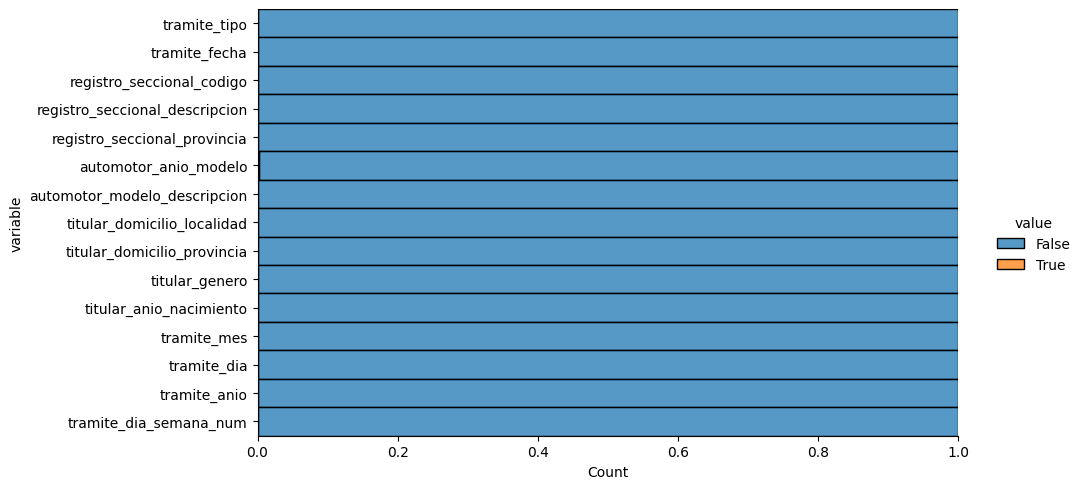

In [39]:
#la funcion .melt nos devuelve una tabla con el nombre de la variable y su valor
# en este caso su valor es si es nulo o no
(
    df_filtrado
    .isna()
    .melt()
    .pipe(
        lambda df_filtrado:(
            sns.displot(
                data=df_filtrado,
                y='variable',
                hue='value',
                multiple='fill',
                aspect = 2
            )
        )
    )
)

visualizamos de otra forma, con un mapa de calor por ejemplo

### visualizamos los valores nulos con un mapa de calor

<Axes: >

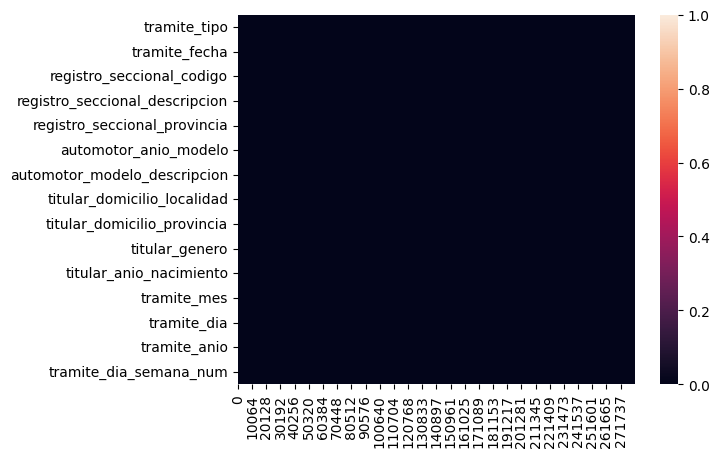

In [40]:
# la"T" es lo mismo que poner transpose() osea la funcion transpuesta
(
    df_filtrado
    .isna()
    .T
    .pipe(
        lambda df:(
            sns.heatmap(
                data=df
            )
        )
    )
)

##Nuevo data frame sin valores nulos

In [41]:
# Creamos un nuevo DataFrame eliminando todas las filas con valores nulos
df_filtrado_notnull = df_filtrado.dropna().reset_index(drop=True)

# Calculate the age of the titleholder at the time of the procedure
df_filtrado_notnull['edad_titular'] = df_filtrado_notnull['tramite_anio'] - df_filtrado_notnull['titular_anio_nacimiento']

# Mostramos una descripción rápida del nuevo DataFrame
df_filtrado_notnull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280683 entries, 0 to 280682
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   tramite_tipo                    280683 non-null  category      
 1   tramite_fecha                   280683 non-null  datetime64[ns]
 2   registro_seccional_codigo       280683 non-null  category      
 3   registro_seccional_descripcion  280683 non-null  object        
 4   registro_seccional_provincia    280683 non-null  category      
 5   automotor_anio_modelo           280683 non-null  Int64         
 6   automotor_modelo_descripcion    280683 non-null  category      
 7   titular_domicilio_localidad     280683 non-null  category      
 8   titular_domicilio_provincia     280683 non-null  category      
 9   titular_genero                  280683 non-null  category      
 10  titular_anio_nacimiento         280683 non-null  Int64  

#**ANALISIS EXPLORATORIO DE DATOS**

Aqui es donde empezamos a responder algunas preguntas que nos propusimos como objetivo al inicio del proyecto

## Evolución de denuncias de robo por año

<Axes: title={'center': 'Evolución de Denuncias de Robo por Año a nivel Nacional'}, xlabel='Año', ylabel='Cantidad Denuncias de Robo'>

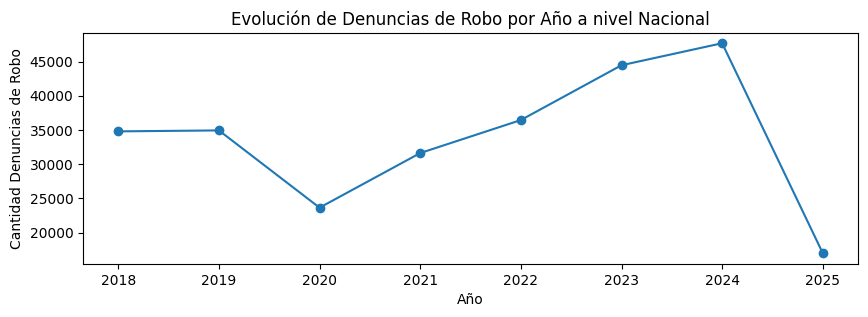

In [101]:
#Filtrar solo por los tipo

df_filtrado_notnull_robo = df_filtrado_notnull[df_filtrado_notnull['tramite_tipo'] == 'DENUNCIA DE ROBO O HURTO']

#ahora agrupamos para contar

denuncias_robo_por_anio = df_filtrado_notnull_robo.groupby('tramite_anio')['tramite_tipo'].count()

denuncias_robo_por_anio.plot(
    kind='line',
    x=denuncias_robo_por_anio.index,
    y=denuncias_robo_por_anio.values,
    marker='o',
    title='Evolución de Denuncias de Robo por Año a nivel Nacional',
    xlabel='Año',
    ylabel='Cantidad Denuncias de Robo',
    figsize=(10, 3)
)


##¿Que dia de la semana hay mas denuncias de robo?

In [43]:
denuncias_robo_dia_semana = df_filtrado_notnull_robo.groupby('tramite_dia_semana_num')['tramite_tipo'].count()

<Axes: title={'center': 'Denuncias de Robo por Día de la Semana'}, xlabel='Día de la Semana', ylabel='Cantidad Denuncias de Robo'>

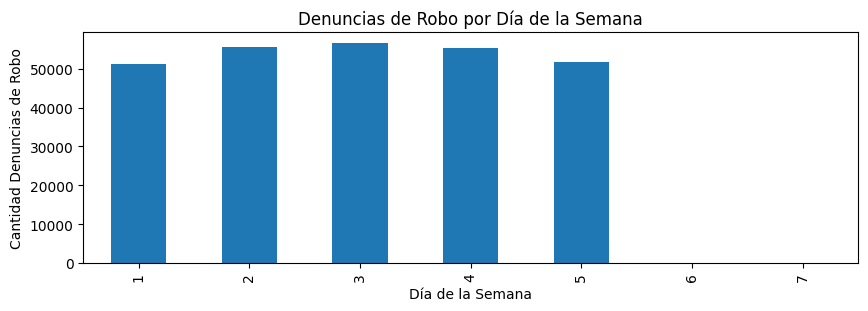

In [44]:
denuncias_robo_dia_semana.plot(
    kind='bar',
    figsize=(10, 3),
    x=denuncias_robo_dia_semana.index,
    y=denuncias_robo_dia_semana.values,
    title='Denuncias de Robo por Día de la Semana',
    xlabel='Día de la Semana',
    ylabel='Cantidad Denuncias de Robo',
)

Aqui podemos obervar que en los diferentes dias habiles de la semana, se ven casi la misma cantidad denuncias por robo

##¿En que meses hay mas denuncias de robo?

In [45]:
df_filtrado_notnull_robo_mes = df_filtrado_notnull_robo.groupby('tramite_mes')['tramite_tipo'].count()

<Axes: title={'center': 'Denuncias de Robo por Mes'}, xlabel='Mes', ylabel='Cantidad Denuncias de Robo'>

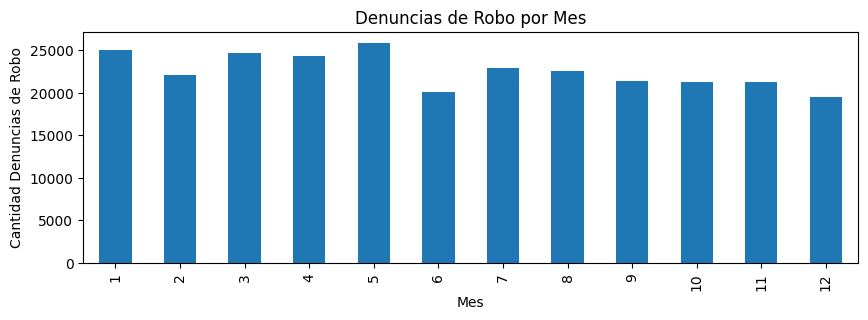

In [46]:
df_filtrado_notnull_robo_mes.plot(
    kind='bar',
    figsize=(10, 3),
    x=df_filtrado_notnull_robo_mes.index,
    y=df_filtrado_notnull_robo_mes.values,
    xlabel='Mes',
    ylabel='Cantidad Denuncias de Robo',
    title='Denuncias de Robo por Mes',
)

## ¿Cuáles son las juridicciones con más robos de autos registrados?

/tmp/ipython-input-47-1079556334.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filtrado_notnull_robo_provincia = df_filtrado_notnull_robo.groupby('registro_seccional_provincia')['tramite_tipo'].count().sort_values(ascending=False)


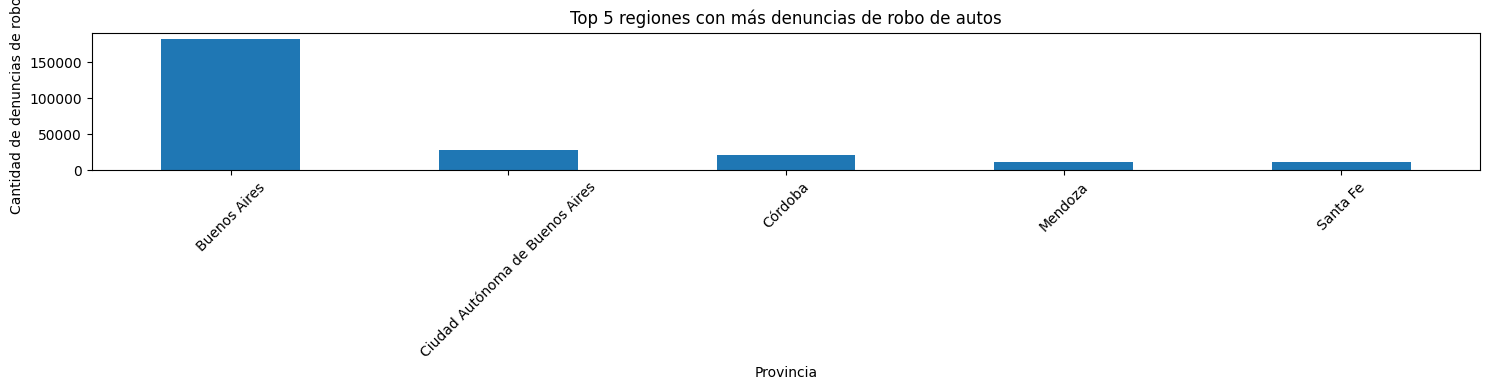

In [47]:
df_filtrado_notnull_robo_provincia = df_filtrado_notnull_robo.groupby('registro_seccional_provincia')['tramite_tipo'].count().sort_values(ascending=False)
df_provincias_con_mas_denuncias_robo = df_filtrado_notnull_robo_provincia.reset_index().rename(columns={'tramite_tipo': 'cantidad'}).sort_values(by='cantidad', ascending=False).head(5)

df_provincias_con_mas_denuncias_robo

df_provincias_con_mas_denuncias_robo.head(5).plot(
    kind='bar',
    x='registro_seccional_provincia',
    y='cantidad',
    title='Top 5 regiones con más denuncias de robo de autos',
    xlabel='Provincia',
    ylabel='Cantidad de denuncias de robos',
    figsize=(15, 4),
    legend=False
)

plt.xticks(rotation=45)
plt.tight_layout()

##Gráfico de líneas múltiples por mes, uno por cada año

<Figure size 1200x600 with 0 Axes>

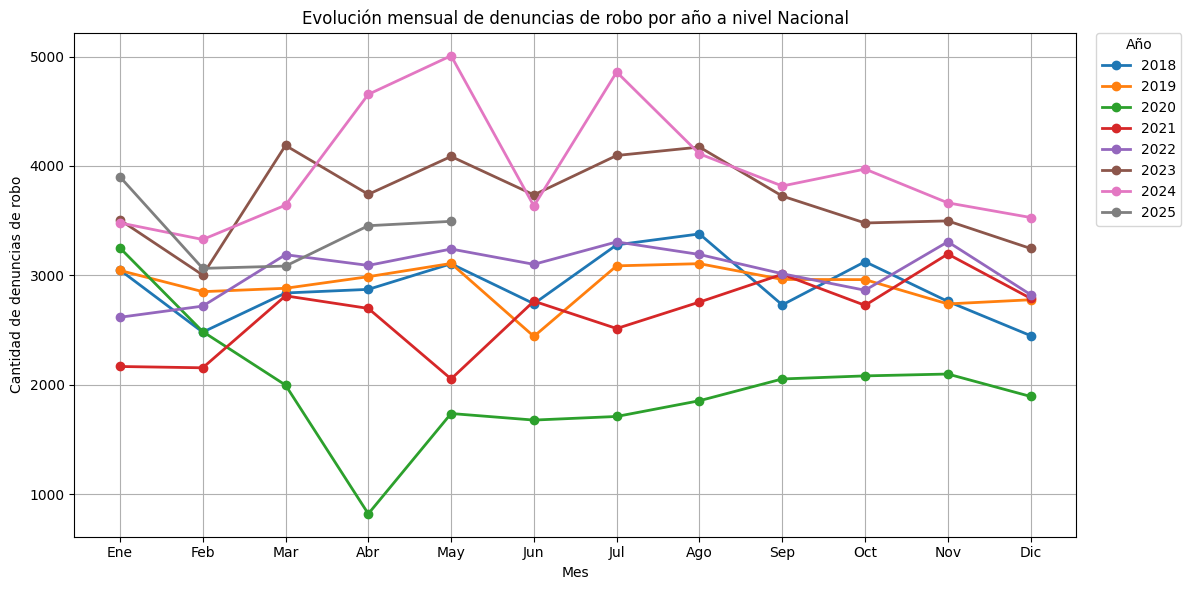

In [100]:
denuncias_robo_mes_anio = (
    df_filtrado_notnull_robo
    .groupby(['tramite_anio', 'tramite_mes'])['tramite_tipo']
    .count()
    .reset_index()
    .rename(columns={'tramite_tipo': 'cantidad'})
)

tabla_pivot = denuncias_robo_mes_anio.pivot(
    index='tramite_mes',
    columns='tramite_anio',
    values='cantidad'
)
plt.figure(figsize=(12, 6))
tabla_pivot.plot(
    kind='line',
    marker='o',
    linewidth=2,
    figsize=(12, 6)
)

plt.title('Evolución mensual de denuncias de robo por año a nivel Nacional')
plt.xlabel('Mes')
plt.ylabel('Cantidad de denuncias de robo')
plt.xticks(ticks=range(1, 13), labels=[
    'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
    'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'
])
plt.legend(
    title='Año',
    bbox_to_anchor=(1.02, 1),  # Mueve la leyenda fuera del gráfico
    loc='upper left',          # Ancla la leyenda desde su esquina superior izquierda
    borderaxespad=0.  # Separación con respecto al gráfico
)
plt.grid(True)
plt.tight_layout()
plt.show()


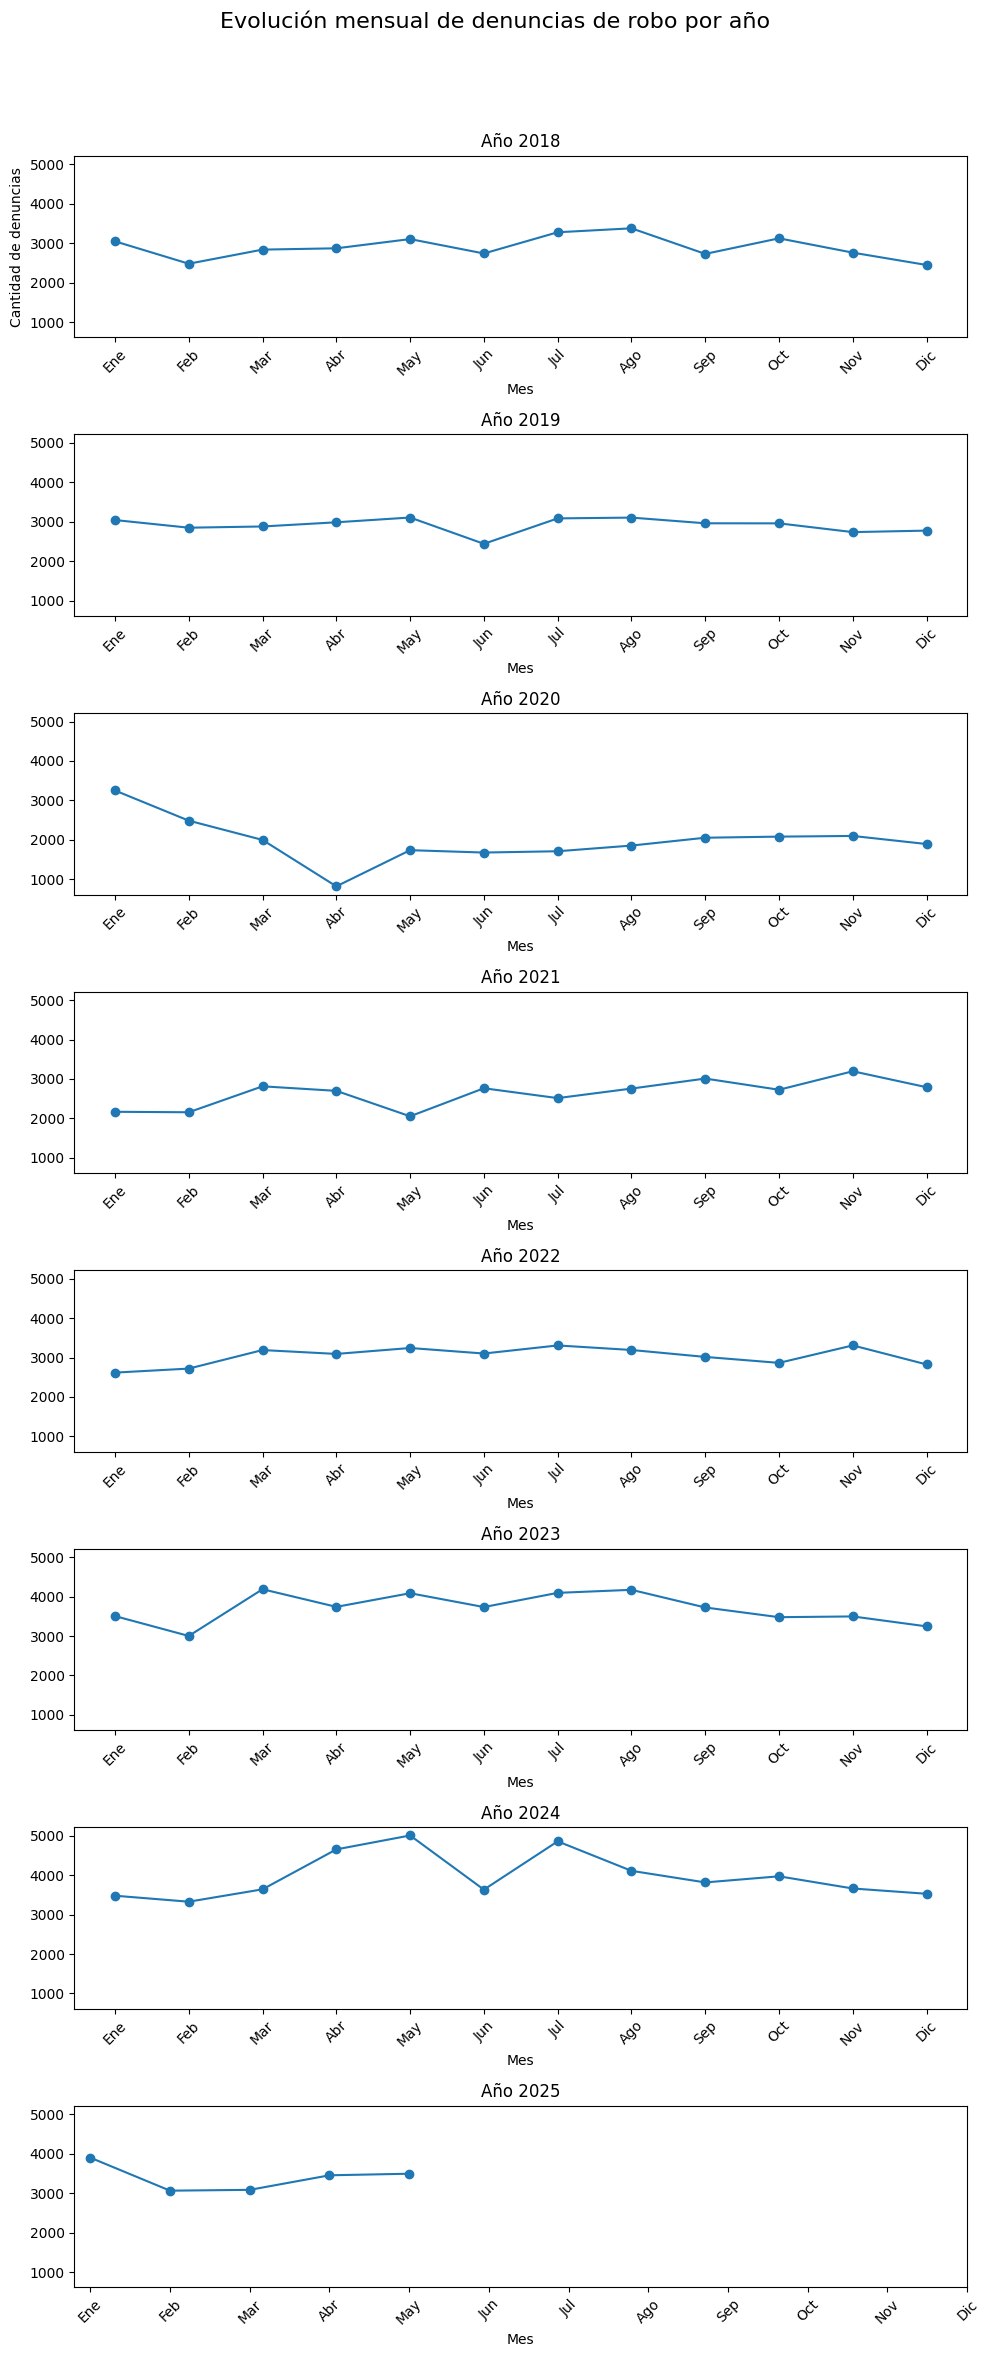

In [49]:
# Lista de años únicos
anios = sorted(denuncias_robo_mes_anio['tramite_anio'].unique())
n = len(anios)

# Crear figura con subplots: una fila, n columnas
fig, axes = plt.subplots(n, 1, figsize=(10, 3*n), sharey=True)

# Si solo hay un año, axes no es una lista, lo convertimos
if n == 1:
    axes = [axes]

# Graficar cada año por separado
for i, anio in enumerate(anios):
    # Filtrar datos del año actual
    data_anio = denuncias_robo_mes_anio[denuncias_robo_mes_anio['tramite_anio'] == anio]

    # Crear gráfico de línea para ese año
    axes[i].plot(data_anio['tramite_mes'], data_anio['cantidad'], marker='o')
    axes[i].set_title(f'Año {anio}')
    axes[i].set_xticks(range(1, 13))
    axes[i].set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
                             'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=45)
    axes[i].set_xlabel('Mes')
    if i == 0:
        axes[i].set_ylabel('Cantidad de denuncias')

# Ajustar el diseño
plt.suptitle('Evolución mensual de denuncias de robo por año', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # deja
plt.show()


## Cantidad de denuncias de robo en jujuy desde 2018 a 2025

In [50]:
df_filtrado_notnull_robo_jujuy = df_filtrado_notnull_robo[df_filtrado_notnull_robo['registro_seccional_provincia'] == 'Jujuy'].reset_index(drop=True)

In [51]:
df_filtrado_notnull_robo_jujuy_cantidad_robo = (df_filtrado_notnull_robo_jujuy
                                                .groupby(['registro_seccional_descripcion'])
                                                ['tramite_tipo']
                                                .count()
                                                .reset_index()
                                                .rename(columns={'tramite_tipo': 'cantidad'}))

df_filtrado_notnull_robo_jujuy_cantidad_robo

,registro_seccional_descripcion,cantidad
0,LA QUIACA,15
1,LIB. GRAL. SAN MARTIN,45
2,PERICO,32
3,SAN PEDRO DE JUJUY,24
4,SAN SALVADOR DE JUJUY Nº 1,30
5,SAN SALVADOR DE JUJUY Nº 2,24
6,SAN SALVADOR DE JUJUY Nº 3,46
7,SAN SALVADOR DE JUJUY Nº 4,17


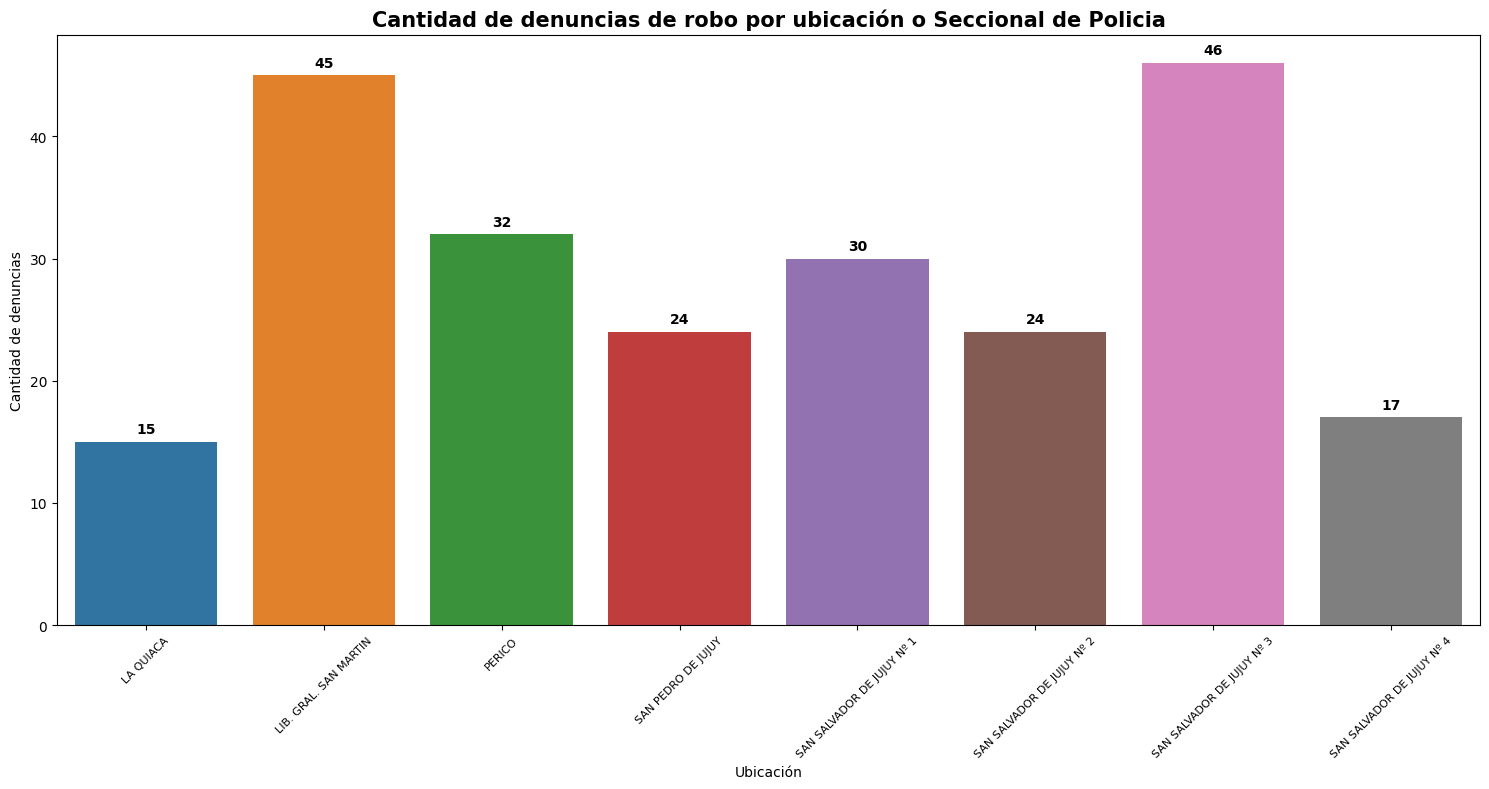

In [53]:
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 8))

ax = sns.barplot(
    data=df_filtrado_notnull_robo_jujuy_cantidad_robo,
    x='registro_seccional_descripcion',
    y='cantidad',
    hue='registro_seccional_descripcion',
    legend=False  # ocultamos la leyenda porque se repite lo mismo que en X
)

# Rotamos etiquetas del eje X
plt.xticks(rotation=45, fontsize=8)

# Títulos y etiquetas
plt.title('Cantidad de denuncias de robo por ubicación o Seccional de Policia', fontweight='bold', fontsize=15)
plt.xlabel('Ubicación')
plt.ylabel('Cantidad de denuncias')

# Agregar etiquetas de valor encima de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=4, fontweight='bold', fontsize=10)


# Mostrar el gráfico
plt.tight_layout()
plt.show()


##Evolucion por año de las denuncias de robo en jujuy

In [80]:
df_filtrado_notnull_robo_jujuy_cantidad_robo_por_anio = (df_filtrado_notnull_robo_jujuy
                                                .groupby(['tramite_anio'])
                                                ['tramite_tipo']
                                                .count()
                                                .reset_index()
)

df_filtrado_notnull_robo_jujuy_cantidad_robo_por_anio

,tramite_anio,tramite_tipo
0,2018,31
1,2019,27
2,2020,16
3,2021,23
4,2022,38
5,2023,50
6,2024,33
7,2025,15


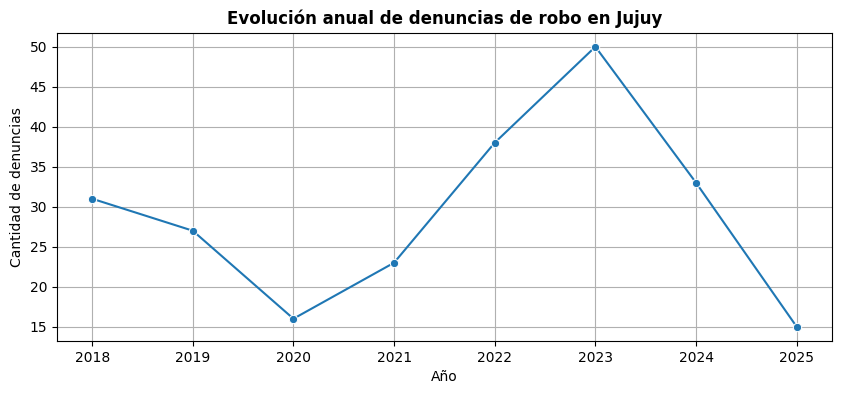

In [99]:
fig, ax = plt.subplots(figsize=(10, 4))

sns.lineplot(
    data=df_filtrado_notnull_robo_jujuy_cantidad_robo_por_anio,
    x='tramite_anio',
    y='tramite_tipo',
    marker='o'
)

plt.title('Evolución anual de denuncias de robo en Jujuy', fontweight='bold')
plt.xlabel('Año')
plt.ylabel('Cantidad de denuncias')
plt.grid(True)
plt.show()